## Gradient Descent with Summation Units

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
file_path = './DATA.csv'
training_data = np.genfromtxt(file_path, delimiter=',')

In [5]:
training_data.shape

(1000, 3)

In [6]:
num_pts = training_data.shape[0]

In [7]:
x = training_data[:, 0:2]
d = training_data[:, 2:3]

### Weights and Bias

In [8]:
#Weights and bias between input and hidden layer
w1 = np.random.uniform(low=-1, high=1, size=(2, 2))
b1 = np.random.uniform(low=-1, high=1, size=(2, 1))

#Weights and bias between hidden and output layer
w2 = np.random.uniform(low=-1, high=1, size=(1, 2))
b2 = np.random.uniform(low=-1, high=1, size=(1, 1))

### Sigmoid Function

In [9]:
def sigmoid(x):
    
    return 1/(1+np.exp(-x))

### Feedforward Function

In [10]:
def feedforward(inp):
    
    #Hidden Layer Computations
    z1 = np.matmul(w1, inp) + b1
    y1 = sigmoid(z1)
    
    #Output Layer Computations
    z2 = np.matmul(w2, y1) + b2
    o = sigmoid(z2)
    
    return o, y1

## Backpropagation Function

In [11]:
def backpropagation(eta, d, o, y1, inp):
    
    delta_w2 = np.zeros_like(w2)
    delta_b2 = np.zeros_like(b2)
    
    #Loops
    for i in range(1):
        
        delta_b2[i, 0] = eta*(o-d)*o*(1-o)
        
        for j in range(2):
            
            delta_w2[i, j] = eta*(o-d)*o*(1-o)*y1[j, i]
            
    delta_w1 = np.zeros_like(w1)
    delta_b1 = np.zeros_like(b1)
    
    for i in range(2):
        
        delta_b1[i, 0] = eta*(o-d)*o*(1-o)*w2[0, i]*y1[i, 0]*(1-y1[i, 0])
        
        for j in range(2):
            
            delta_w1[i, j] = eta*(o-d)*o*(1-o)*w2[0, i]*y1[i, 0]*(1-y1[i, 0])*inp[j, 0]
            
    return delta_w1, delta_b1, delta_w2, delta_b2

### Online Training

In [12]:
num_epochs = 300
eta = 0.1
o = np.zeros_like(d)

Epoch: 0 Error: 24.274286514699725
Epoch: 50 Error: 0.3365596725857877
Epoch: 100 Error: 0.30888614104746115
Epoch: 150 Error: 0.2880548306833246
Epoch: 200 Error: 0.2714547574974525
Epoch: 250 Error: 0.2579879239482823


Text(0.5, 1.0, 'Error vs num epochs - Online Training')

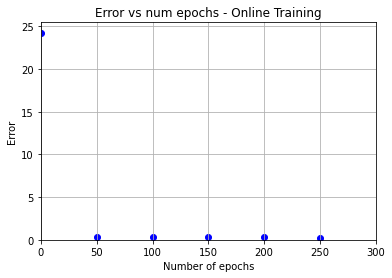

In [13]:
for epoch in range(num_epochs):
    
    for i in range(num_pts):
        
        inp = np.array([[x[i, 0]], [x[i, 1]]])
        
        o[i, 0], y1 = feedforward(inp)
        
        delta_w1, delta_b1, delta_w2, delta_b2 = backpropagation(eta, d[i, 0], o[i, 0], y1, inp)
        
        w1 -= delta_w1
        b1 -= delta_b1
        
        w2 -= delta_w2
        b2 -= delta_b2
        
    e = 0.5*np.sum((o-d)**2)
    
    if epoch%50 == 0:
        
        print('Epoch: {}'.format(epoch) + ' Error: {}'.format(e))
        
        plt.scatter(epoch, e, c='b')

#Plot
plt.grid()
plt.xlim(0, num_epochs)
plt.ylim(0,)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Error vs num epochs - Online Training')

In [14]:
np.savetxt('weights_DATA.txt', (w1, b1, w2, b2), fmt='%s', delimiter=',')

### Testing weights

In [15]:
#Defining random values
inp = np.array([[0.33], [0.44]])

o, _ = feedforward(inp)

print('network output: {}'.format(o[0, 0]))
print('desired output: {}'.format(np.sin(inp[0, 0]+inp[1, 0])))

network output: 0.7047096045684037
desired output: 0.6961352386273567


### Reinitailization of weights

In [16]:
#Weights and bias between input and hidden layer
w1 = np.random.uniform(low=-1, high=1, size=(2, 2))
b1 = np.random.uniform(low=-1, high=1, size=(2, 1))

#Weights and bias between hidden and output layer
w2 = np.random.uniform(low=-1, high=1, size=(1, 2))
b2 = np.random.uniform(low=-1, high=1, size=(1, 1))

### Batch Training

In [17]:
num_epochs = 1000
eta = 0.1
o = np.zeros_like(d)

Epoch: 0 Error: 37.097367818442684
Epoch: 50 Error: 0.21667124474354577
Epoch: 100 Error: 0.19400406546000665
Epoch: 150 Error: 0.18595020257743577
Epoch: 200 Error: 0.18128594070225046
Epoch: 250 Error: 0.17776329138638985
Epoch: 300 Error: 0.1747767895187145
Epoch: 350 Error: 0.1721248431611325
Epoch: 400 Error: 0.169723843635532
Epoch: 450 Error: 0.16752954637148065
Epoch: 500 Error: 0.16551300478473058
Epoch: 550 Error: 0.1636525723943329
Epoch: 600 Error: 0.16193093369545342
Epoch: 650 Error: 0.16033376653963666
Epoch: 700 Error: 0.15884897522558028
Epoch: 750 Error: 0.1574661707204327
Epoch: 800 Error: 0.1561762968224318
Epoch: 850 Error: 0.15497136022447355
Epoch: 900 Error: 0.1538442364535348
Epoch: 950 Error: 0.15278852912026825


Text(0.5, 1.0, 'Error vs num epochs - Batch Training')

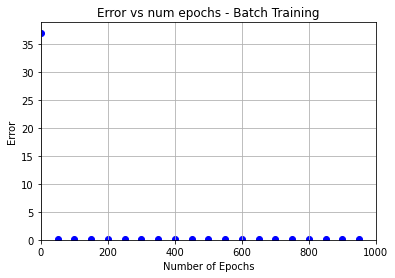

In [18]:
delta_w1_batch = np.zeros_like(w1)
delta_b1_batch = np.zeros_like(b1)

delta_w2_batch = np.zeros_like(w2)
delta_b2_batch = np.zeros_like(b2)

for epoch in range(num_epochs):
    
    for i in range(num_pts):
        
        inp = np.array([[x[i, 0]], [x[i, 1]]])
        
        o[i, 0], y1 = feedforward(inp)
        
        delta_w1, delta_b1, delta_w2, delta_b2 = backpropagation(eta, d[i, 0], o[i, 0], y1, inp)
        
        delta_w1_batch += delta_w1
        delta_b1_batch += delta_b1
        
        delta_w2_batch += delta_w2
        delta_b2_batch += delta_b2
        
        if i%100 == 0:
            
            w1 -= delta_w1_batch
            b1 -= delta_b1_batch
            
            w2 -= delta_w2_batch
            b2 -= delta_b2_batch
            
            delta_w1_batch = np.zeros_like(w1)
            delta_b1_batch = np.zeros_like(b1)
            delta_w2_batch = np.zeros_like(w2)
            delta_b2_batch = np.zeros_like(b2)
            
    e = 0.5*np.sum((o-d)**2)
    
    if epoch%50 == 0:
        
        print('Epoch: {}'.format(epoch) + ' Error: {}'.format(e))
        
        plt.scatter(epoch, e, c='b')

plt.grid()
plt.xlim(0, num_epochs)
plt.ylim(0,)
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Error vs num epochs - Batch Training')        

In [19]:
inp = np.array([[0.55], [0.44]])

o, _ = feedforward(inp)

print('network output: {}'.format(o[0, 0]))
print('desired output: {}'.format(np.sin(inp[0, 0]+inp[1, 0])))

network output: 0.851260108420242
desired output: 0.8360259786005205


Text(0.5, 0.98, 'Plots of network output vs desired output')

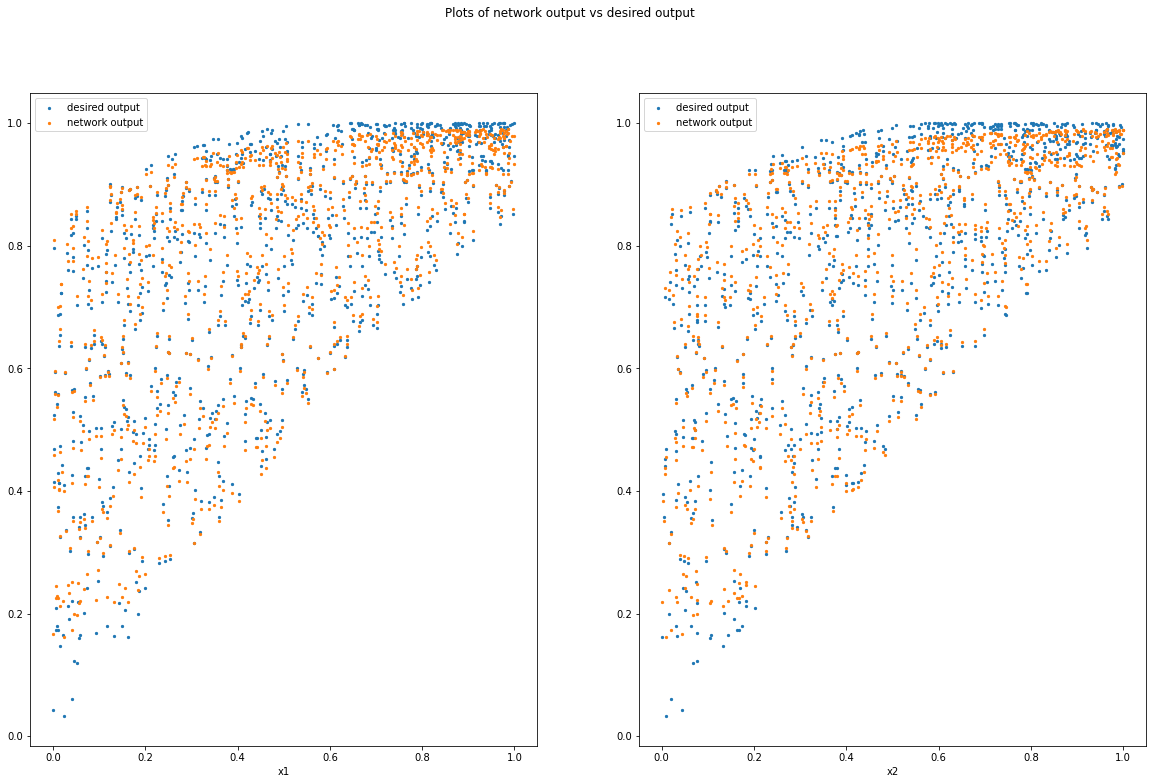

In [20]:
o = np.zeros_like(d)

for i in range(num_pts):
    
    inp = np.array([[x[i, 0]], [x[i, 1]]])
    o[i, 0],_ = feedforward(inp)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 12))

ax[0].scatter(x[:, 0], d, s=5, label='desired output')
ax[0].scatter(x[:, 0], o, s=5, label='network output')
ax[0].set_xlabel('x1')
ax[0].legend()

ax[1].scatter(x[:, 1], d, s=5, label='desired output')
ax[1].scatter(x[:, 1], o, s=5, label='network output')
ax[1].set_xlabel('x2')
ax[1].legend()

fig.suptitle('Plots of network output vs desired output')